# 3x3 assembly inputfile that: 

### Import module/Set up XS path/Create openMC model/Clean directory

In [1]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
import pandas as pd
from IPython.display import Image
import glob

### Pablo environnement

In [2]:
model=openmc.Model()

clean_file_list = ["model.xml", "materials.xml", "geometry.xml","plots.xml","geometry.xml","settings.xml","tallies.out","summary.h5","statepoint.50.h5"]
for file in clean_file_list :
    path_file = os.path.join(os.getcwd(), file)
    if os.path.exists(path_file):
        os.remove(path_file)

### Define Materials

In [3]:
uo2 = openmc.Material(name='uo2')
uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')
uo2.set_density('g/cm3', 10.257 )
uo2.temperature=600

zirconium = openmc.Material(name="zirconium")
zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')
zirconium.set_density('g/cm3',  6.56)
zirconium.temperature=600


water = openmc.Material(name="water")
water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')
water.temperature=600
water.set_density('g/cm3', 0.743)
water.add_s_alpha_beta('c_H_in_H2O')

helium = openmc.Material(name="helium")
helium.add_nuclide('He4',1, 'ao')
helium.temperature=600
helium.set_density('g/cm3', 0.17860E-03)

pyrex_mat = openmc.Material(name="pyrex_mat")
pyrex_mat.add_nuclide('B10',9.63266E-04, 'ao')
pyrex_mat.add_nuclide('B11',3.90172E-03, 'ao')
pyrex_mat.add_nuclide('O16',4.67761E-02, 'ao')
pyrex_mat.add_nuclide('Si28',1.81980E-02, 'ao')
pyrex_mat.add_nuclide('Si29',9.24474E-04, 'ao')
pyrex_mat.add_nuclide('Si30',6.10133E-04, 'ao')
pyrex_mat.set_density('g/cm3', 2.25 )
pyrex_mat.temperature=600


SS304 = openmc.Material(name="SS304")
SS304.add_nuclide('C0',3.20895E-04, 'ao')
SS304.add_nuclide('Si28',1.58197E-03, 'ao')
SS304.add_nuclide('Si29',8.03653E-05, 'ao')
SS304.add_nuclide('Si30',5.30394E-05, 'ao')
SS304.add_nuclide('P31',6.99938E-05, 'ao')
SS304.add_nuclide('Cr50',7.64915E-04, 'ao')
SS304.add_nuclide('Cr52',1.47506E-02, 'ao')
SS304.add_nuclide('Cr53',1.67260E-03, 'ao')
SS304.add_nuclide('Cr54',4.16346E-04, 'ao')
SS304.add_nuclide('Mn55',1.75387E-03, 'ao')
SS304.add_nuclide('Fe54',3.44776E-03, 'ao')
SS304.add_nuclide('Fe56',5.41225E-02, 'ao')
SS304.add_nuclide('Fe57',1.24992E-03, 'ao')
SS304.add_nuclide('Fe58',1.66342E-04, 'ao')
SS304.add_nuclide('Ni58',5.30854E-03, 'ao')
SS304.add_nuclide('Ni60',2.04484E-03, 'ao')
SS304.add_nuclide('Ni61',8.88879E-05, 'ao')
SS304.add_nuclide('Ni62',2.83413E-04, 'ao')
SS304.add_nuclide('Ni64',7.21770E-05, 'ao')
SS304.set_density('g/cm3', 8.00 )
SS304.temperature=600


model.materials = openmc.Materials([uo2, zirconium, water,helium,pyrex_mat,SS304]) 
#Perso path
model.materials.cross_sections = '/home/pablo/internship/xs_for_input/cross_sections.xml'
#Mac path
#model.materials.cross_sections = '/Users/pablogarcia44/repo/endfb-vii.1-hdf5/cross_sections.xml'

### Create pincell

In [4]:
def pincell(index_x,index_y):
    fuel_outer_radius = openmc.ZCylinder(r=0.4096)
    clad_inner_radius = openmc.ZCylinder(r=0.418)
    clad_outer_radius = openmc.ZCylinder(r=0.475)
    pitch = 1.26
    left = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right = openmc.XPlane(pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top = openmc.YPlane(pitch/2, boundary_type='transmission')
    fuel_region = -fuel_outer_radius
    gap_region = +fuel_outer_radius & -clad_inner_radius
    clad_region = +clad_inner_radius & -clad_outer_radius
    water_region = +left & -right & +bottom & -top & +clad_outer_radius
    fuel = openmc.Cell(name='fuel'+'_'+str(index_x)+'_'+str(index_y))
    fuel.fill = uo2
    fuel.region = fuel_region
    gap = openmc.Cell(name='gap'+'_'+str(index_x)+'_'+str(index_y))
    gap.region = gap_region
    gap.fill = helium
    clad = openmc.Cell(name='clad'+'_'+str(index_x)+'_'+str(index_y))
    clad.fill = zirconium
    clad.region = clad_region
    moderator = openmc.Cell(name='moderator'+'_'+str(index_x)+'_'+str(index_y))
    moderator.fill = water
    moderator.region = water_region 
    u = openmc.Universe(name='u'+'_'+str(index_x)+'_'+str(index_y),cells=(fuel, gap, clad, moderator))
    return(u,fuel,gap,clad,moderator)

### Create guide tube

In [5]:
def guide(index_x,index_y):
    clad_inner_radius = openmc.ZCylinder(r=0.561)
    clad_outer_radius = openmc.ZCylinder(r=0.602)
    pitch = 1.26
    left = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right = openmc.XPlane(pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top = openmc.YPlane(pitch/2, boundary_type='transmission')       
    clad_region = +clad_inner_radius & -clad_outer_radius
    water_region = +left & -right & +bottom & -top & +clad_outer_radius
    water_guide_region= -clad_inner_radius
    water_guide = openmc.Cell(name='water_guide'+'_'+str(index_x)+'_'+str(index_y))
    water_guide.fill = water
    water_guide.region = water_guide_region
    clad = openmc.Cell(name='clad_guide'+'_'+str(index_x)+'_'+str(index_y))
    clad.fill = zirconium
    clad.region = clad_region
    moderator = openmc.Cell(name='moderator'+'_'+str(index_x)+'_'+str(index_y))
    moderator.fill = water
    moderator.region = water_region 
    u = openmc.Universe(name='u_guide'+'_'+str(index_x)+'_'+str(index_y),cells=(water_guide, clad, moderator))
    return(u,water_guide,water_guide,clad,moderator)

### Create instrumentation tube

In [6]:
def instru(index_x,index_y):
    clad_inner_radius = openmc.ZCylinder(r=0.559)
    clad_outer_radius = openmc.ZCylinder(r=0.605)
    pitch = 1.26
    left = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right = openmc.XPlane(pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top = openmc.YPlane(pitch/2, boundary_type='transmission')       
    clad_region = +clad_inner_radius & -clad_outer_radius
    water_region = +left & -right & +bottom & -top & +clad_outer_radius
    water_guide_region= -clad_inner_radius
    water_guide = openmc.Cell(name='water_guide'+'_'+str(index_x)+'_'+str(index_y))
    water_guide.fill = water
    water_guide.region = water_guide_region
    clad = openmc.Cell(name='clad_guide'+'_'+str(index_x)+'_'+str(index_y))
    clad.fill = zirconium
    clad.region = clad_region
    moderator = openmc.Cell(name='moderator'+'_'+str(index_x)+'_'+str(index_y))
    moderator.fill = water
    moderator.region = water_region 
    u = openmc.Universe(name='u_guide'+'_'+str(index_x)+'_'+str(index_y),cells=(water_guide, clad, moderator))
    return(u,water_guide,water_guide,clad,moderator)

### Create pyrex tube

In [7]:
def pyrex_pin(index_x,index_y):
    guide_inner_radius = openmc.ZCylinder(r=0.559)
    guide_outer_radius = openmc.ZCylinder(r=0.605)
    Inner_Tube_Inner_Radius= openmc.ZCylinder(r=0.214)
    Inner_Tube_Outer_Radius= openmc.ZCylinder(r= 0.231)
    Pyrex_Inner_Radius= openmc.ZCylinder(r= 0.241)
    Pyrex_Outer_Radius= openmc.ZCylinder(r= 0.427)
    Cladding_Inner_Radius= openmc.ZCylinder(r= 0.437)
    Cladding_Outer_Radius= openmc.ZCylinder(r= 0.484)
    pitch = 1.26
    left = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right = openmc.XPlane(pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top = openmc.YPlane(pitch/2, boundary_type='transmission')
    
    pyrex_region= +Pyrex_Inner_Radius & -Pyrex_Outer_Radius
    water_region = +left & -right & +bottom & -top & +guide_outer_radius | +Cladding_Outer_Radius & -guide_inner_radius |-Inner_Tube_Inner_Radius
    guide_region = +guide_inner_radius & -guide_outer_radius
    steel_region = +Cladding_Inner_Radius & -Cladding_Outer_Radius | +Inner_Tube_Inner_Radius & -Inner_Tube_Outer_Radius
    gap_region = +Inner_Tube_Outer_Radius & -Pyrex_Inner_Radius |  +Pyrex_Outer_Radius & - Cladding_Inner_Radius
     
    steel_cell = openmc.Cell(name='steel_cell'+'_'+str(index_x)+'_'+str(index_y))
    steel_cell.fill = SS304
    steel_cell.region = steel_region    
    gap_cell = openmc.Cell(name='gap_cell'+'_'+str(index_x)+'_'+str(index_y))
    gap_cell.region = gap_region 
    gap_cell.fill = helium
    pyrex_cell = openmc.Cell(name='pyrex_cell'+'_'+str(index_x)+'_'+str(index_y))
    pyrex_cell.fill = pyrex_mat
    pyrex_cell.region = pyrex_region     
    water_cell = openmc.Cell(name='water_cell'+'_'+str(index_x)+'_'+str(index_y))
    water_cell.fill = water
    water_cell.region = water_region
    guide_cell = openmc.Cell(name='guide_cell'+'_'+str(index_x)+'_'+str(index_y))
    guide_cell.fill = zirconium
    guide_cell.region = guide_region
    
    
    u = openmc.Universe(name='u_pyrex'+'_'+str(index_x)+'_'+str(index_y),cells=(steel_cell,gap_cell,pyrex_cell,guide_cell,water_cell))
    return(u,steel_cell,gap_cell,pyrex_cell,guide_cell,water_cell)

### Mappping

In [8]:
GT=[(8,2),(3,3),(5,5),(2,8)]
IT=[(8,8)]
PT=[(5,2),(2,5),(8,5),(5,8)]

GT_left=[]
GT_full=[]
for X in GT:
    GT_left.append((X[0],X[1]))
    GT_left.append((X[0],16-X[1]))
for X in GT_left:
    GT_full.append((X[0],X[1]))
    GT_full.append((16-X[0],X[1]))    
GT_full = list(set(GT_full))

PT_left=[]
PT_full=[]
for X in PT:
    PT_left.append((X[0],X[1]))
    PT_left.append((X[0],16-X[1]))
for X in PT_left:
    PT_full.append((X[0],X[1]))
    PT_full.append((16-X[0],X[1]))    
PT_full = list(set(PT_full))


### Define assembly

In [9]:
assembly = openmc.RectLattice()
pitch=1.26

dr=4e-2 # cm of water that is outside assembly
size=17 #size of the assembly 
pitch_assembly=size*pitch+2*dr 
assembly.pitch = (pitch,pitch)

assembly.lower_left = (-size/2*pitch, -size/2*pitch)


A= np.empty((size, size), dtype=openmc.universe.Universe)
   

for ix in range(size):
    for iy in range(size):
        if (ix,iy) in GT_full : 
            A[ix][iy]=guide(ix,iy)[0]
        elif (ix,iy) in PT_full :
            A[ix][iy]=pyrex_pin(ix,iy)[0]
        elif (ix,iy) in IT:
            A[ix][iy]=instru(ix,iy)[0]           
        else:
            A[ix][iy]=pincell(ix,iy)[0]
            
          
            
            

        
assembly.universes = A

moderator_outside = openmc.Cell()
moderator_outside.fill = water
all_water = openmc.Universe()
all_water.add_cell(moderator_outside)
assembly.outer=all_water

rod_height=385.1
# 1/4 assembly
min_x = openmc.XPlane(x0=-(size/2*pitch+dr), boundary_type='reflective')
max_x = openmc.XPlane(x0=0, boundary_type='reflective')
min_y = openmc.YPlane(y0=0, boundary_type='reflective')
max_y = openmc.YPlane(y0=+(size/2*pitch+dr), boundary_type='reflective')
min_z = openmc.ZPlane(z0=-rod_height/2, boundary_type='reflective')
max_z = openmc.ZPlane(z0=+rod_height/2, boundary_type='reflective')



root_cell = openmc.Cell(name='root cell', fill=assembly)
root_cell.region = +min_x & -max_x & +min_y & -max_y & +min_z & -max_z

model.geometry.root_universe = openmc.Universe(name='root universe')
model.geometry.root_universe.add_cell(root_cell)

### Plot

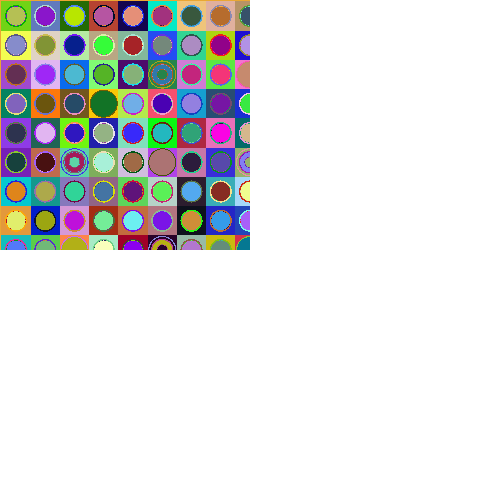

In [10]:
model.materials.export_to_xml()
model.geometry.export_to_xml()
plot = openmc.Plot.from_geometry(model.geometry)
plot.pixels = (500, 500)
plot.width = (pitch_assembly+dr, pitch_assembly+dr)
plot.origin = (0., 0., 0)
plot.color_by = 'cell'
plot.to_ipython_image()

### Choose settings

In [11]:
bounds = [-pitch_assembly/2, 0, -rod_height/2, 0, +pitch_assembly/2, rod_height/2]
#bounds = [-pitch_assembly/2, 0, -10, 0, +pitch_assembly/2, 10]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
source = openmc.IndependentSource(space=uniform_dist)
source.time = openmc.stats.Uniform(0, 1e-6)
settings = openmc.Settings()
settings.source = source
settings = openmc.Settings()
settings.source = source
settings.batches = 50
settings.inactive = 10
settings.particles = 50000
settings.output = {'tallies':True}
settings.temperature['method'] = 'interpolation'
model.settings = settings

### Define and choose energy group

In [12]:
choose_group=openmc.mgxs.GROUP_STRUCTURES['XMAS-172']
name_group='XMAS172'

### Create MGXS tallies for mgxs directory

mgxs_lib = openmc.mgxs.Library(model.geometry)
groups = openmc.mgxs.EnergyGroups(choose_group)
mgxs_lib.energy_groups = groups
mgxs_lib.scatter_format = "legendre"
mgxs_lib.legendre_order = 3
mgxs_lib.mgxs_types = ['total', 'absorption', 'fission', 'nu-fission', 'chi', 'scatter matrix', 'nu-scatter matrix', 'inverse-velocity']
mgxs_lib.tally_trigger =openmc.Trigger('std_dev', 1e-2)
mgxs_lib.by_nuclide = False
mgxs_lib.domain_type = 'cell'
mgxs_lib.domains = model.geometry.get_all_material_cells().values()
mgxs_lib.build_library()
tallies = openmc.Tallies()
mgxs_lib.add_to_tallies_file(tallies, merge=True)
model.tallies = tallies

#model.export_to_xml()
model.export_to_model_xml('model_2A_1_family.xml')

### Create power tally

In [13]:
tally_power = openmc.Tally(name='power')
tally_flux = openmc.Tally(name='flux')
tally_fission = openmc.Tally(name='fission')


all_cell=model.geometry.get_all_material_cells().values()
A=[]
for cell in all_cell:
    A.append(cell)   
all_cell=openmc.CellFilter(A)
tally_power.scores = ['heating']
tally_power.filters = [all_cell]
tally_fission.scores = ['fission']
tally_fission.filters = [all_cell]
energy_filter = openmc.EnergyFilter([0.0, 4.0, 1.0e6])
tally_flux.scores = ['flux']
tally_flux.filters = [all_cell,energy_filter]


tallies = openmc.Tallies([tally_power,tally_flux,tally_fission])
model.tallies=tallies

#model.export_to_xml()
model.export_to_model_xml('model_2E_72_families_power.xml')

### Run OpenMC model

sp_file = model.run()